In [93]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [94]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/food-demand-prediction-dataset/Food demand.csv


In [95]:
df = pd.read_csv("/kaggle/input/food-demand-prediction-dataset/Food demand.csv")
df.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1000000,3,157,2760,233.83,231.83,0,0,149
1,1000001,100,104,2956,486.03,583.03,0,0,161
2,1000002,143,75,1971,328.86,327.86,0,0,149
3,1000003,41,24,2539,145.53,145.53,0,0,540
4,1000004,45,83,2539,95.06,120.34,0,0,271


In [96]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()


In [97]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# Food demand.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('/kaggle/input/food-demand-prediction-dataset/Food demand.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'Food demand.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 9 columns


In [98]:
df1.head(5)

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1000000,3,157,2760,233.83,231.83,0,0,149
1,1000001,100,104,2956,486.03,583.03,0,0,161
2,1000002,143,75,1971,328.86,327.86,0,0,149
3,1000003,41,24,2539,145.53,145.53,0,0,540
4,1000004,45,83,2539,95.06,120.34,0,0,271


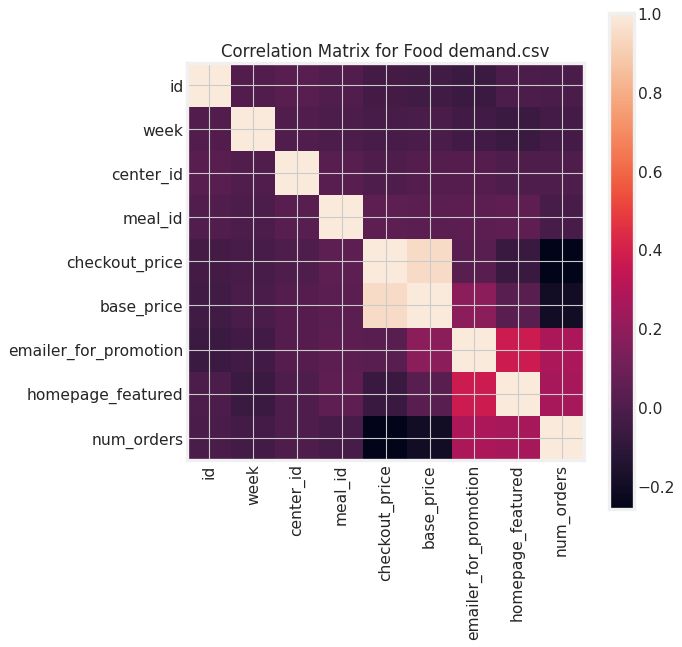

In [99]:
plotCorrelationMatrix(df1, 8)

In [100]:
print(df1)

          id  week  center_id  meal_id  checkout_price  base_price  \
0    1000000     3        157     2760          233.83      231.83   
1    1000001   100        104     2956          486.03      583.03   
2    1000002   143         75     1971          328.86      327.86   
3    1000003    41         24     2539          145.53      145.53   
4    1000004    45         83     2539           95.06      120.34   
..       ...   ...        ...      ...             ...         ...   
995  1001090    79        143     2444          514.13      629.53   
996  1001091    76        174     2539          144.56      143.56   
997  1001092    52        143     2492          446.23      445.23   
998  1001093   129        109     1198          169.75      171.75   
999  1001094    66         64     2826          329.86      328.86   

     emailer_for_promotion  homepage_featured  num_orders  
0                        0                  0         149  
1                        0             

In [101]:
#memilih data untuk modeling
import pandas as pd

food_demand = '../input/food-demand-prediction-dataset/Food demand.csv'
food_data = pd.read_csv(food_demand) 
food_data.columns

Index(['id', 'week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured', 'num_orders'],
      dtype='object')

In [102]:
food_data.describe()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
count,1.999000e+03,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000
mean,1.001093e+06,75.393197,81.649825,2010.123562,327.302596,347.972866,0.076538,0.105053,258.340170
std,6.323493e+02,41.743802,46.139173,554.686525,150.906902,158.625091,0.265924,0.306698,413.743045
min,1.000000e+06,1.000000,10.000000,1062.000000,65.020000,93.120000,0.000000,0.000000,13.000000
25%,1.000546e+06,40.000000,43.000000,1543.000000,222.645000,242.530000,0.000000,0.000000,55.000000
50%,1.001094e+06,78.000000,76.000000,1971.000000,292.030000,309.430000,0.000000,0.000000,148.000000
75%,1.001638e+06,111.500000,110.000000,2539.000000,435.530000,447.230000,0.000000,0.000000,324.000000
max,1.002181e+06,145.000000,186.000000,2956.000000,767.330000,767.330000,1.000000,1.000000,12137.000000


In [103]:
#memilih prediction target
y = food_data.base_price

In [104]:
food_features = ['center_id', 'meal_id', 'checkout_price', 'base_price']

In [105]:
X = food_data[food_features]

In [106]:
X.describe()

,center_id,meal_id,checkout_price,base_price
count,1999.000000,1999.000000,1999.000000,1999.000000
mean,81.649825,2010.123562,327.302596,347.972866
std,46.139173,554.686525,150.906902,158.625091
min,10.000000,1062.000000,65.020000,93.120000
25%,43.000000,1543.000000,222.645000,242.530000
50%,76.000000,1971.000000,292.030000,309.430000
75%,110.000000,2539.000000,435.530000,447.230000
max,186.000000,2956.000000,767.330000,767.330000


In [107]:
X.head()

,center_id,meal_id,checkout_price,base_price
0,157,2760,233.83,231.83
1,104,2956,486.03,583.03
2,75,1971,328.86,327.86
3,24,2539,145.53,145.53
4,83,2539,95.06,120.34


In [108]:
from sklearn.tree import DecisionTreeRegressor

# Define model. Specify a number for random_state to ensure same results each run
food_model = DecisionTreeRegressor(random_state=1)

# Fit model
food_model.fit(X, y)

DecisionTreeRegressor(random_state=1)

In [109]:
print("Making predictions for the food:")
print(X.head())
print("The predictions are")
print(food_model.predict(X.head()))

Making predictions for the food:
   center_id  meal_id  checkout_price  base_price
0        157     2760          233.83      231.83
1        104     2956          486.03      583.03
2         75     1971          328.86      327.86
3         24     2539          145.53      145.53
4         83     2539           95.06      120.34
The predictions are
[231.83 583.03 327.86 145.53 120.34]


In [110]:
from sklearn.metrics import mean_absolute_error

predicted_food = food_model.predict(X)
mean_absolute_error(y, predicted_food)

2.9040190851225704e-14

In [111]:
from sklearn.model_selection import train_test_split

# split data into training and validation data, for both features and target
# The split is based on a random number generator. Supplying a numeric value to
# the random_state argument guarantees we get the same split every time we
# run this script.
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)
# Define model
food_model = DecisionTreeRegressor()
# Fit model
food_model.fit(train_X, train_y)

# get predicted prices on validation data
val_predictions = food_model.predict(val_X)
print(mean_absolute_error(val_y, val_predictions))

0.17614000000001565


In [112]:
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor

def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

In [113]:
# compare MAE with differing values of max_leaf_nodes
for max_leaf_nodes in [5, 50, 500, 5000]:
    my_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

Max leaf nodes: 5  		 Mean Absolute Error:  25
Max leaf nodes: 50  		 Mean Absolute Error:  1
Max leaf nodes: 500  		 Mean Absolute Error:  0
Max leaf nodes: 5000  		 Mean Absolute Error:  0


In [114]:
candidate_max_leaf_nodes = [5, 50, 500]
# Write loop to find the ideal tree size from candidate_max_leaf_nodes
scores = {leaf_size: get_mae(leaf_size, train_X, val_X, train_y, val_y) for leaf_size in candidate_max_leaf_nodes}

# Store the best value of max_leaf_nodes (it will be either 5, 25, 50, 100, 250 or 500)
best_tree_size = min(scores, key=scores.get)

In [115]:
# Fill in argument to make optimal size and uncomment
final_model = DecisionTreeRegressor(max_leaf_nodes=best_tree_size, random_state=1)

# fit the final model and uncomment the next two lines
final_model.fit(X, y)

DecisionTreeRegressor(max_leaf_nodes=500, random_state=1)

In [116]:
from sklearn.ensemble import RandomForestRegressor

# Define the model. Set random_state to 1
rf_model = RandomForestRegressor()

# fit your model
rf_model.fit(train_X, train_y)

# Calculate the mean absolute error of your Random Forest model on the validation data
rf_val_predictions = rf_model.predict(val_X)
rf_val_mae = mean_absolute_error(rf_val_predictions, val_y)

print("Validation MAE for Random Forest Model: {}".format(rf_val_mae))

Validation MAE for Random Forest Model: 0.22720160000016845


In [117]:
#Visualisasi menggunakan the Decision Tree in Regression Task (Visualisasi)
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

In [ ]:
regr = DecisionTreeRegressor(max_depth=3, random_state=1234)
model = regr.fit(X, y)

In [ ]:
text_representation = tree.export_text(regr)
print(text_representation)

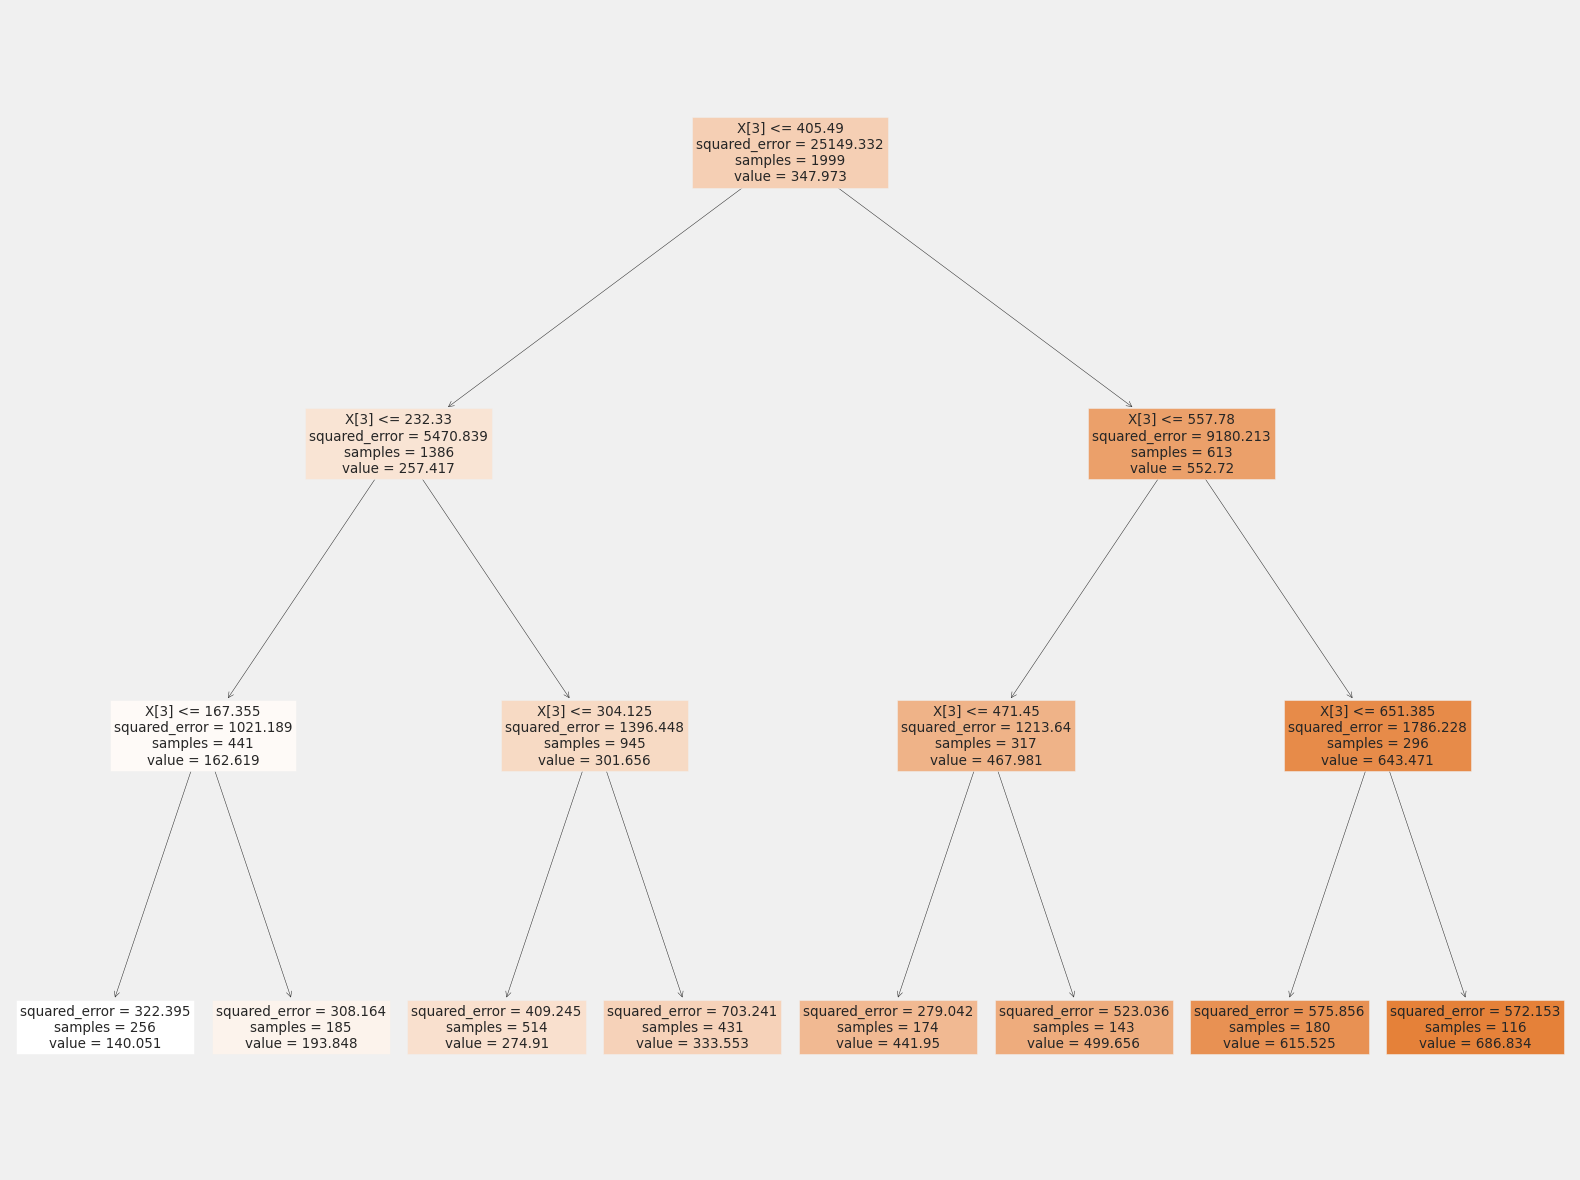

In [119]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(regr, filled=True)

In [ ]:
#Train Decision Tree on Classification Task (Visualisasi 2)
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

In [ ]:
# Prepare the data data
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [ ]:
clf = DecisionTreeClassifier(random_state=1234)
model = clf.fit(X, y)

In [ ]:
text_representation = tree.export_text(clf)
print(text_representation)

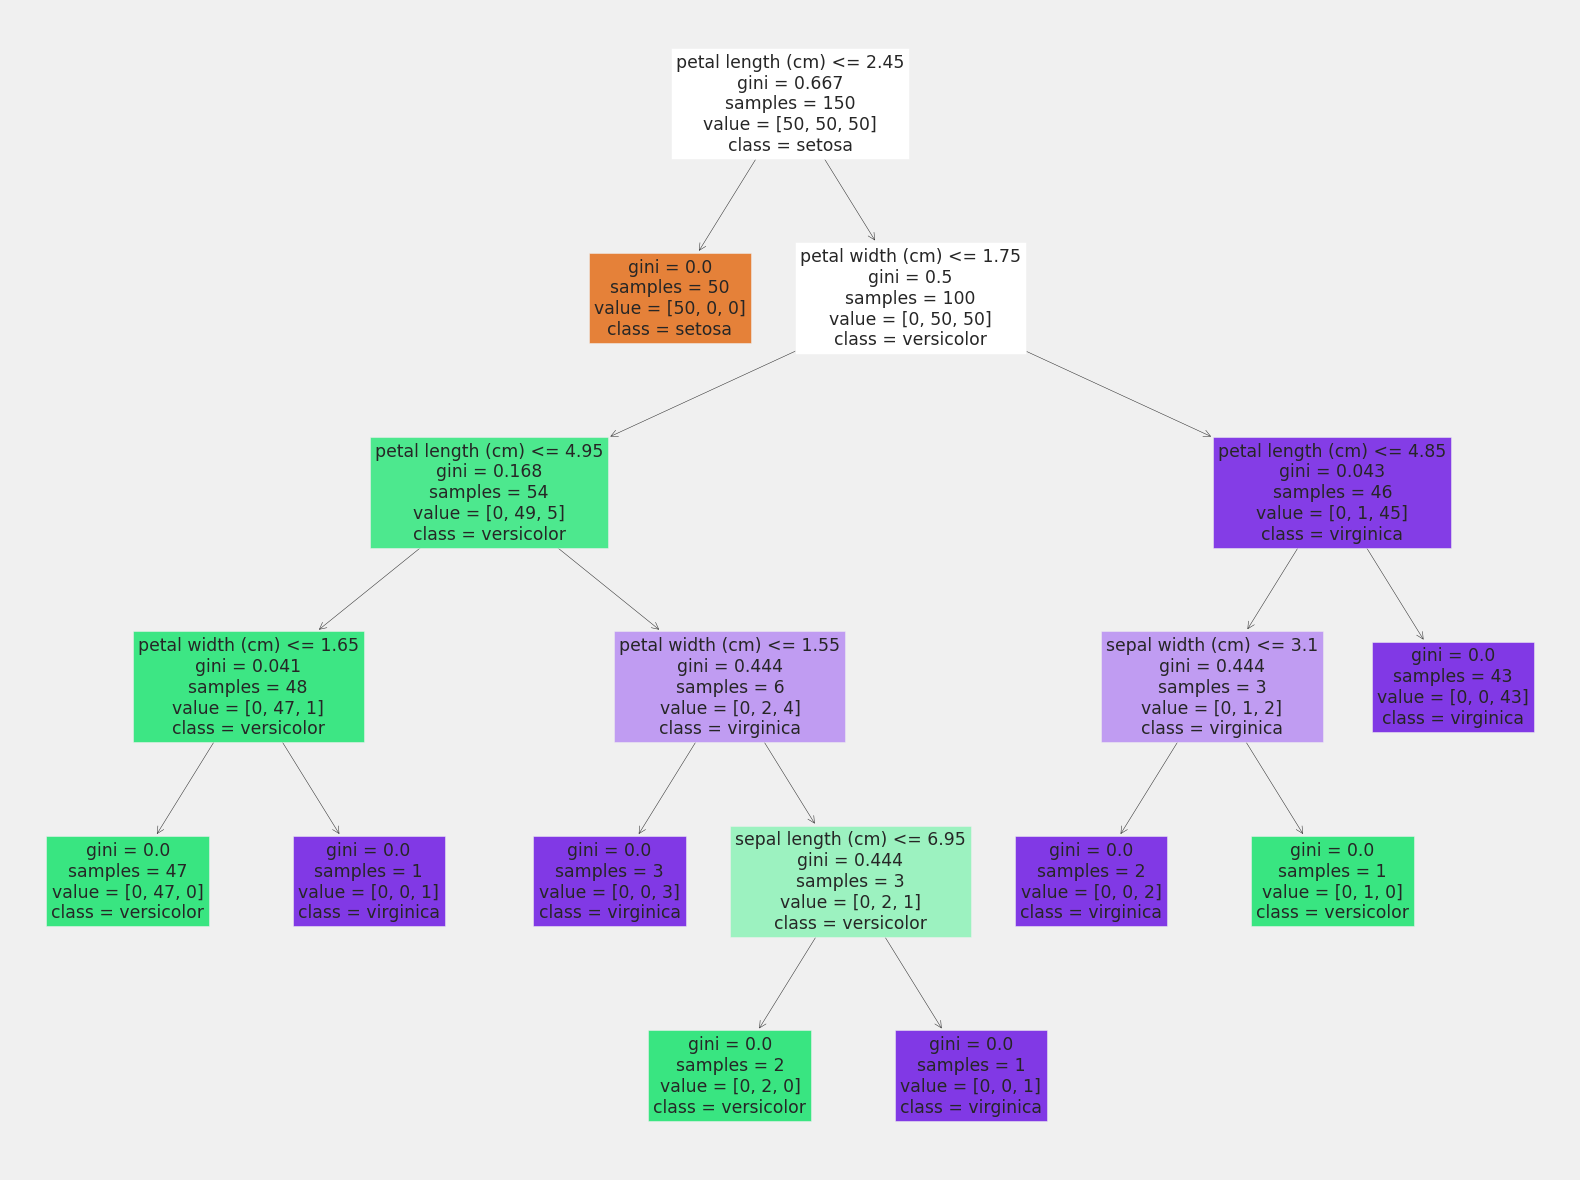

In [120]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=iris.feature_names,  
                   class_names=iris.target_names,
                   filled=True)

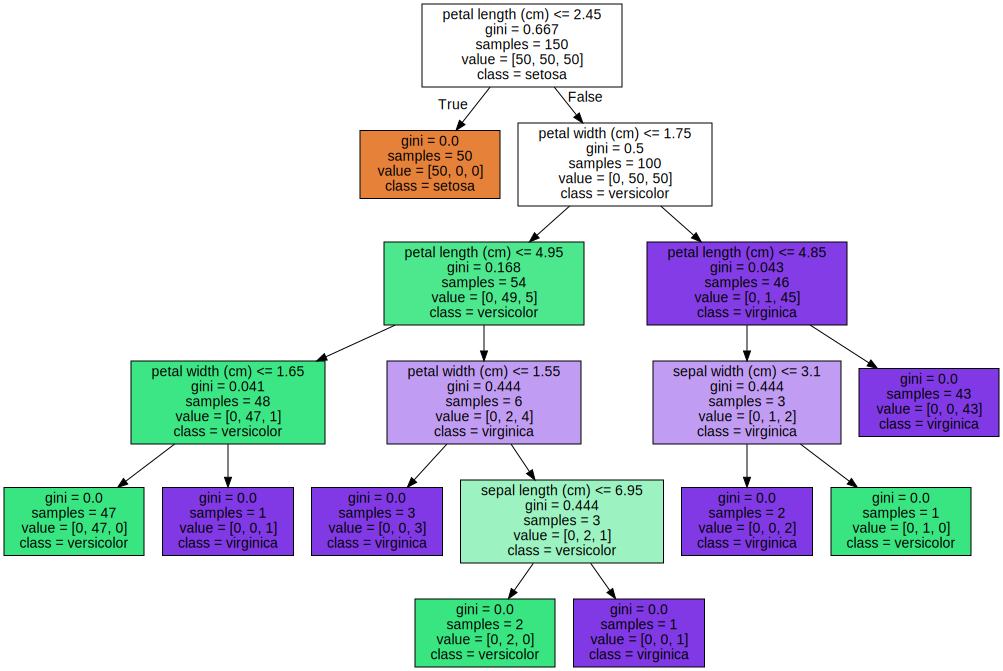

In [123]:
#Visualisasi menggunakan graphvis (Visualisasi 3)
import graphviz
# DOT data
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=iris.feature_names,  
                                class_names=iris.target_names,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph